In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
df=pd.read_csv("./titanic/kc_house_data.csv")

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.duplicated().sum() # zero duplicates

0

In [7]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3325,9485951030,20140924T000000,549900.0,5,3.00,3800,42316,1.5,0,0,...,9,3800,0,1984,0,98042,47.3488,-122.095,2580,35775
9264,4053200410,20140513T000000,273000.0,4,1.50,2180,22870,1.0,0,0,...,6,1280,900,1954,1975,98042,47.3187,-122.081,2420,22614
13060,8019200925,20150429T000000,315000.0,5,1.75,1850,14800,1.5,0,0,...,6,1760,90,1937,0,98168,47.4935,-122.321,1250,14800
10822,6071800310,20140619T000000,558000.0,4,2.25,2060,10358,1.0,0,0,...,8,1320,740,1962,0,98006,47.5478,-122.174,2060,9676
899,8648220270,20150414T000000,291500.0,3,1.75,1260,9600,1.0,0,0,...,7,1260,0,1988,0,98042,47.3592,-122.076,1640,9946


In [11]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [13]:
df['date'] = pd.to_datetime(df['date'])
df["year"]=df['date'].dt.year

In [15]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
1305,8682230550,2014-09-16,428000.0,2,2.00,1350,4225,1.0,0,0,...,1350,0,2003,0,98053,47.7106,-122.030,1660,4225,2014
3692,7468900245,2015-04-20,188200.0,3,1.00,1260,7265,1.0,0,0,...,1260,0,1954,0,98002,47.2979,-122.224,940,7200,2015
15042,8924100305,2015-03-25,855000.0,4,3.00,2590,6250,2.0,0,2,...,2240,350,1964,0,98115,47.6774,-122.267,2260,6780,2015
21007,9126101121,2015-04-07,521500.0,3,2.25,1450,1619,2.0,0,0,...,1140,310,2006,0,98122,47.6076,-122.304,1580,3472,2015
14733,3438501020,2014-11-05,308500.0,2,2.00,840,14564,1.5,0,0,...,840,0,1942,0,98106,47.5499,-122.360,1430,7920,2014
8610,6392002020,2015-03-24,559000.0,3,1.75,1700,6500,1.0,0,0,...,1700,0,1967,0,98115,47.6837,-122.284,1880,6000,2015
15785,2619600010,2014-05-13,635000.0,4,1.75,1950,13320,1.0,0,0,...,1370,580,1969,0,98007,47.6196,-122.139,2120,12051,2014
11711,3176600105,2014-08-13,750000.0,3,2.25,2250,5301,2.0,0,0,...,1510,740,1975,0,98115,47.6741,-122.271,2240,7200,2014
2436,2597710070,2015-04-02,360000.0,2,2.00,1770,7607,1.0,0,0,...,1770,0,1987,0,98058,47.4287,-122.163,2090,7109,2015
20177,3832080440,2014-12-09,261950.0,3,2.50,1880,5000,2.0,0,0,...,1880,0,2010,0,98042,47.3359,-122.054,2260,5000,2014


In [19]:
from datetime import datetime


current_year = datetime.now().year

# Calculate the year difference from the current year
df['Year_Difference'] = current_year - df['date'].dt.year

In [20]:
df['Year_Difference'] 

0        9
1        9
2        8
3        9
4        8
        ..
21608    9
21609    8
21610    9
21611    8
21612    9
Name: Year_Difference, Length: 21613, dtype: int32

In [22]:
corr=df.corr()

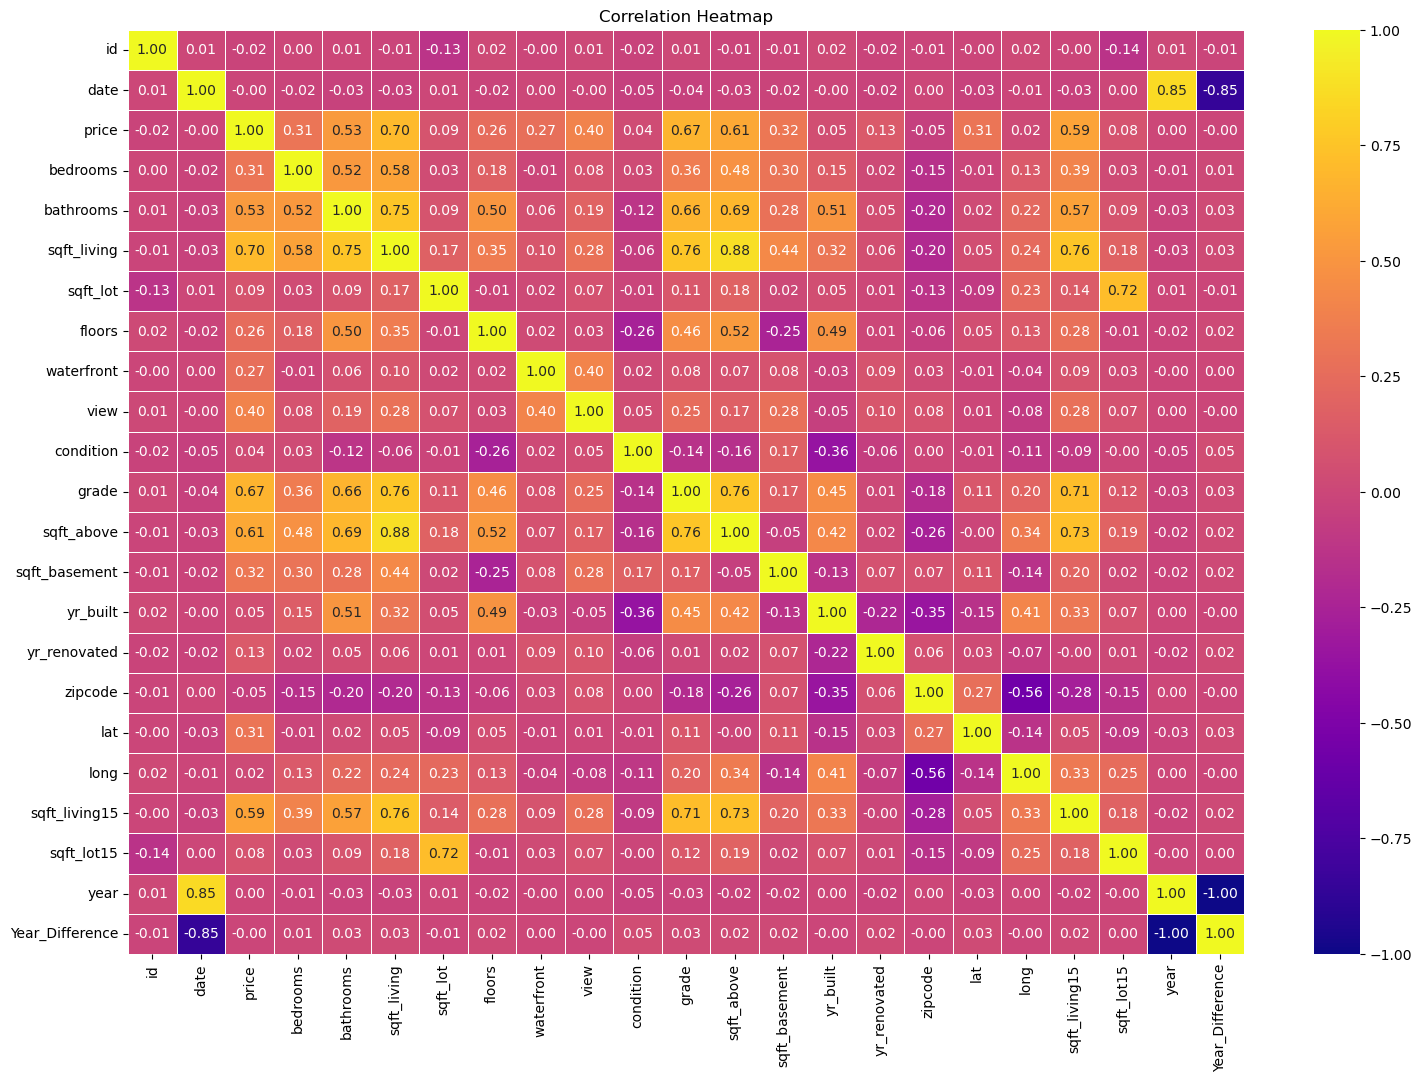

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(corr, annot=True, cmap="plasma", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [46]:
# code to find the feature which are important in price prediction
# experimental step.

# Create a list to store features to keep on which prices depend heavily
features_to_keep = []
correlation_threshold=0.3
maximum_threshold=1
# Identify and add highly correlated features to the removal list
print(corr.columns)
for i in corr.columns:
    print(i)
    print(abs(corr['price'][i]))
    if correlation_threshold<abs(corr['price'][i]) < maximum_threshold:
        features_to_keep.append(i)


# Drop the highly correlated features from the DataFrame
price_dependent_df = df[features_to_keep]

print(df)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year',
       'Year_Difference'],
      dtype='object')
id
0.016762196614444884
date
0.004356679615809388
price
1.0
bedrooms
0.30834959814563934
bathrooms
0.5251375054139628
sqft_living
0.7020350546118005
sqft_lot
0.0896608605871003
floors
0.25679388755071897
waterfront
0.26636943403060204
view
0.39729348829450273
condition
0.03636178912899721
grade
0.6674342560202353
sqft_above
0.6055672983560784
sqft_basement
0.3238160207119844
yr_built
0.05401153149479249
yr_renovated
0.1264337934408933
zipcode
0.05320285429829216
lat
0.3070034799952544
long
0.021626241039337152
sqft_living15
0.5853789035795692
sqft_lot15
0.08244715251948544
year
0.003576040882842265
Year_Difference
0.0035760408824641707
               id       da

In [47]:
print(features_to_keep)

['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']


In [48]:
len(features_to_keep)

9

In [49]:
price_dependent_df.sample(5)

,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
14118,5,2.25,2290,0,8,2290,0,47.7012,2750
18268,3,2.25,1830,0,7,1250,580,47.2899,2240
94,3,1.50,1580,0,8,1290,290,47.6870,1570
15596,4,2.50,2210,0,8,2210,0,47.3500,2200
9865,3,2.50,1990,0,7,1990,0,47.7477,2310


In [51]:
bedroom_df=price_dependent_df.groupby('bedrooms')



In [56]:
price_dependent_df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

In [58]:
price_dependent_df[price_dependent_df['bedrooms']==0].shape

(13, 9)

In [55]:
# Group by the 'Category' column and count the occurrences
count_df = bedroom_df.size().reset_index(name='Count')

print(count_df)

    bedrooms  Count
0          0     13
1          1    199
2          2   2760
3          3   9824
4          4   6882
5          5   1601
6          6    272
7          7     38
8          8     13
9          9      6
10        10      3
11        11      1
12        33      1


In [59]:
num_columns = len(count_df)

# Create a sequential color palette
colors = sns.color_palette("coolwarm", n_colors=num_columns)

In [60]:
colors

[(0.31394635112941177, 0.4200516616941176, 0.8549925410352941),
 (0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.500030564517647, 0.6385084675764706, 0.9810701241058823),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.6984540864549019, 0.7994498841137254, 0.9845774567019608),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.8674276350862745, 0.864376599772549, 0.8626024620196079),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9637718182823529, 0.7490855105725491, 0.6494200432901962),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.9392537715176471, 0.5395814885647059, 0.4239002049294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885),
 (0.8057229630470588, 0.2598131362588235, 0.2305616574)]

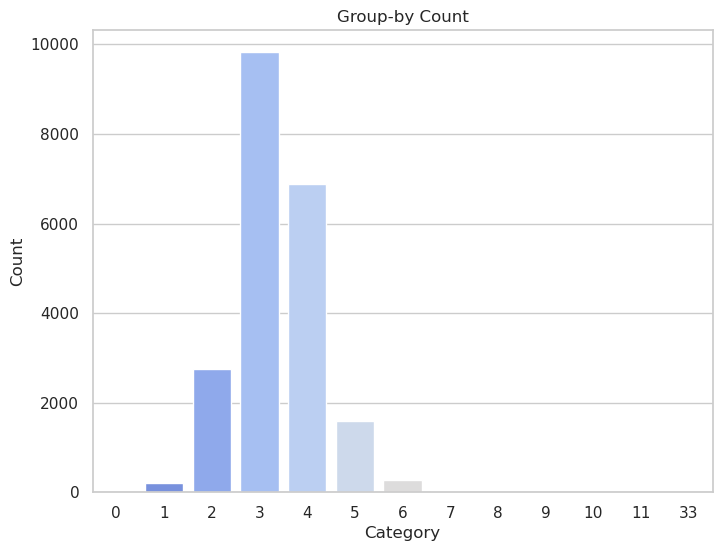

In [61]:

# Create a bar chart with different colors
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(data=count_df, x="bedrooms", y="Count", palette=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Group-by Count')

plt.show()

In [62]:
# Group by the 'Category' column and count the occurrences
bathrooms_df=price_dependent_df.groupby('bathrooms')
count_df = bathrooms_df.size().reset_index(name='Count')

print(count_df)

    bathrooms  Count
0        0.00     10
1        0.50      4
2        0.75     72
3        1.00   3852
4        1.25      9
5        1.50   1446
6        1.75   3048
7        2.00   1930
8        2.25   2047
9        2.50   5380
10       2.75   1185
11       3.00    753
12       3.25    589
13       3.50    731
14       3.75    155
15       4.00    136
16       4.25     79
17       4.50    100
18       4.75     23
19       5.00     21
20       5.25     13
21       5.50     10
22       5.75      4
23       6.00      6
24       6.25      2
25       6.50      2
26       6.75      2
27       7.50      1
28       7.75      1
29       8.00      2


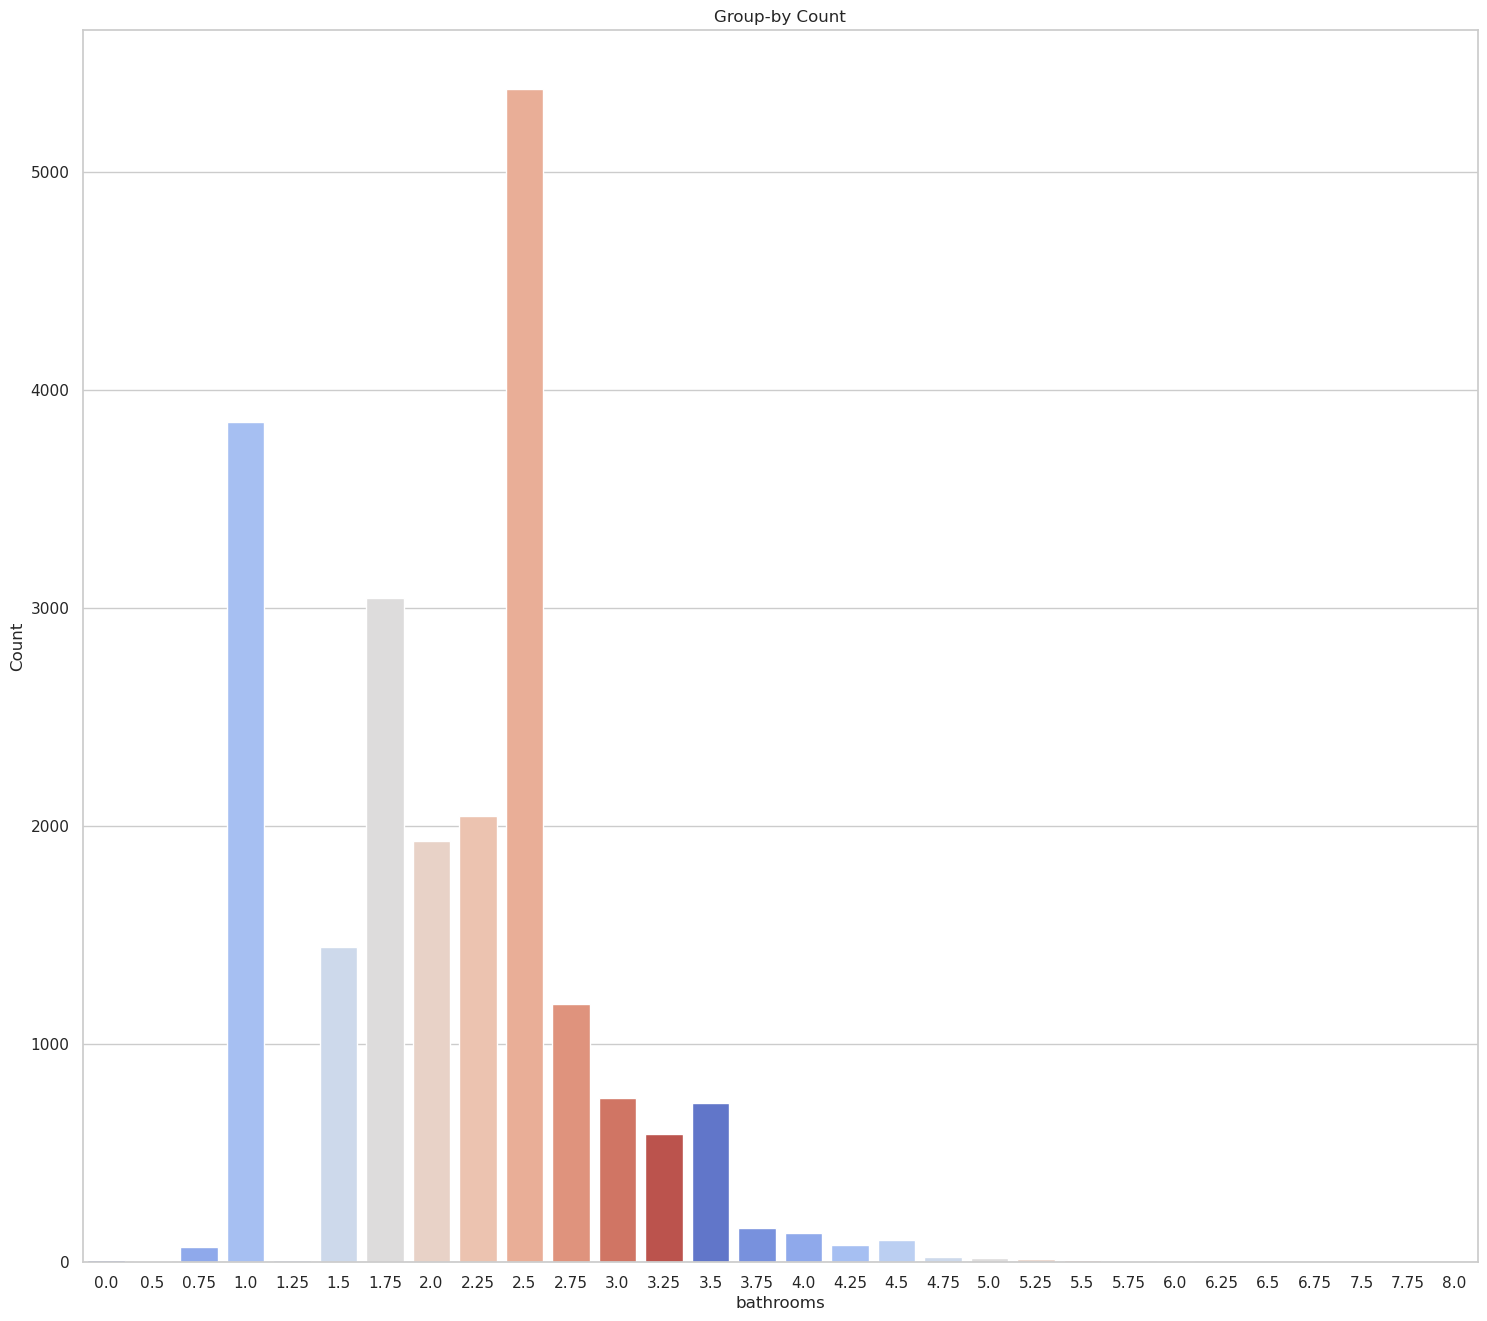

In [64]:
# Create a bar chart with different colors
plt.figure(figsize=(18, 16))
sns.set(style="whitegrid")
sns.barplot(data=count_df, x="bathrooms", y="Count", palette=colors)
plt.xlabel('bathrooms')
plt.ylabel('Count')
plt.title('Group-by Count')

plt.show()

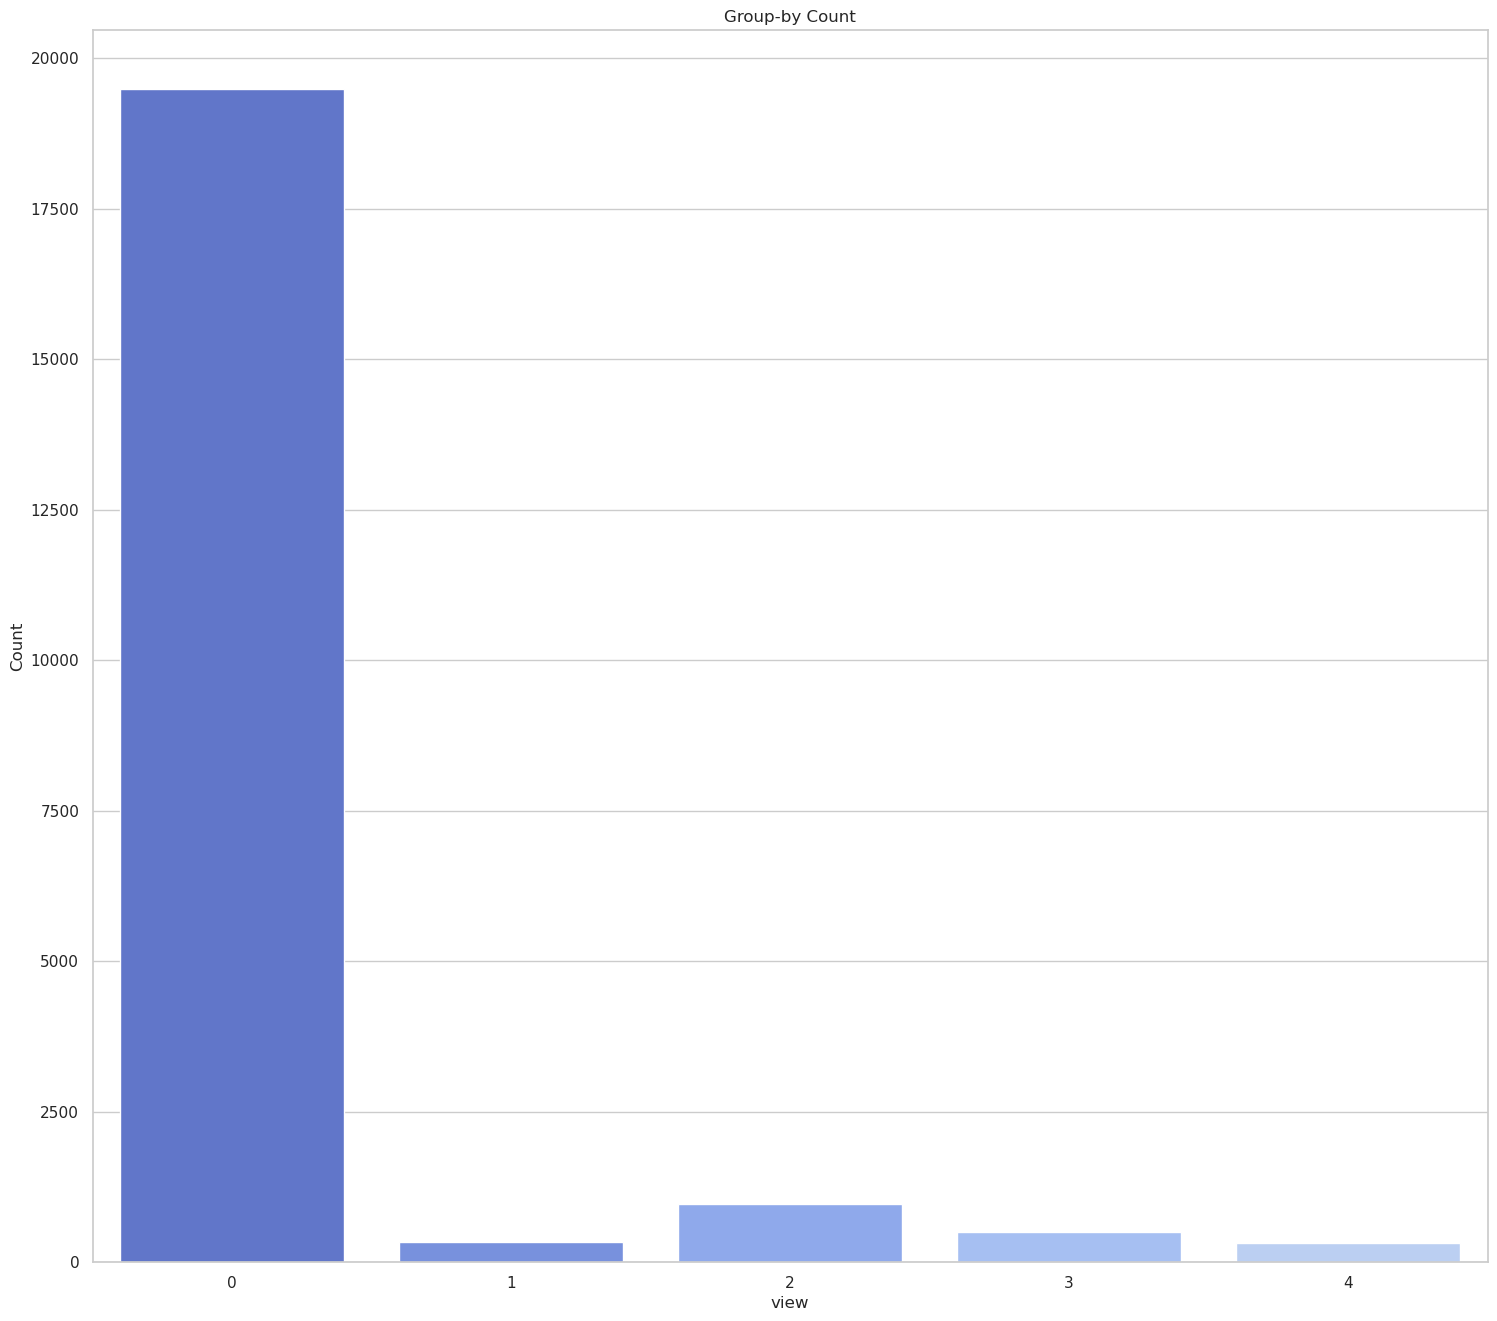

In [67]:
# Group by the 'Category' column and count the occurrences
view_df=price_dependent_df.groupby('view')
count_df = view_df.size().reset_index(name='Count')
# Create a bar chart with different colors
plt.figure(figsize=(18, 16))
sns.set(style="whitegrid")
sns.barplot(data=count_df, x="view", y="Count", palette=colors)
plt.xlabel('view')
plt.ylabel('Count')
plt.title('Group-by Count')

plt.show()


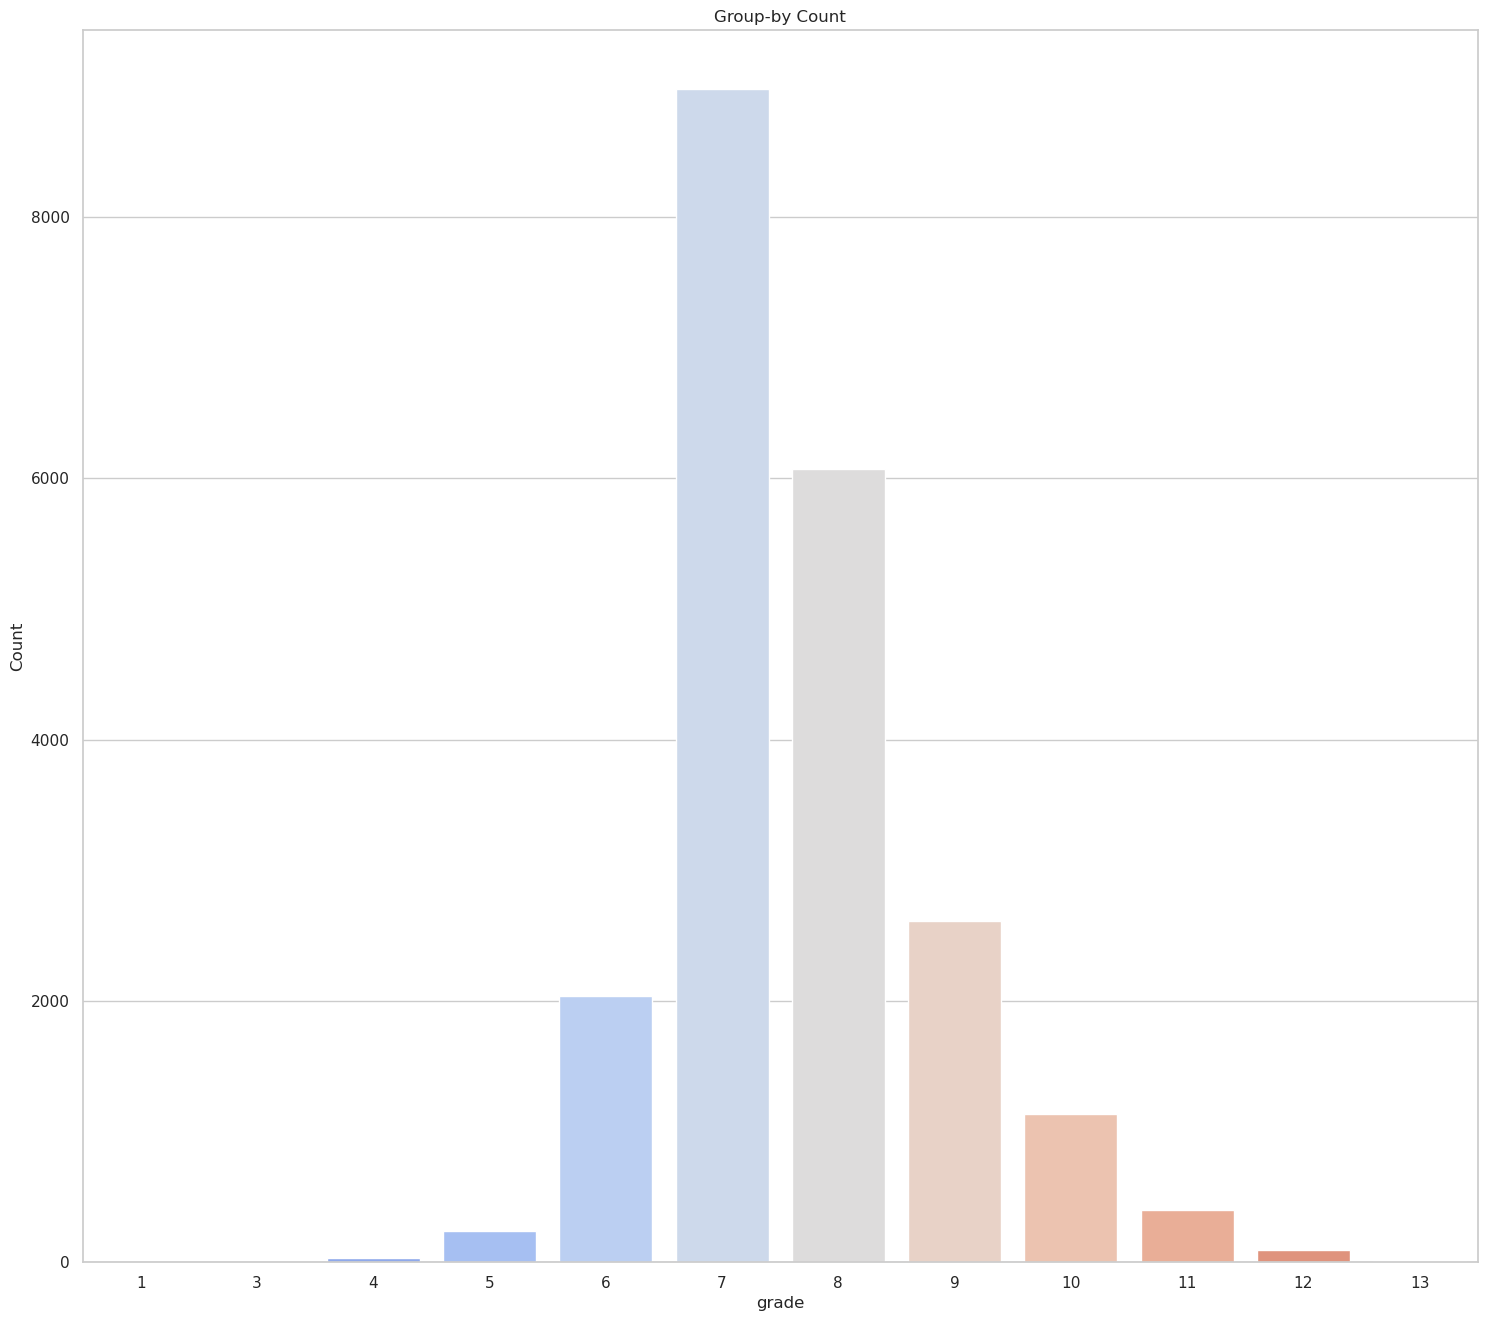

In [70]:
# Group by the 'Category' column and count the occurrences
grade_df=price_dependent_df.groupby('grade')
count_df = grade_df.size().reset_index(name='Count')
# Create a bar chart with different colors
plt.figure(figsize=(18, 16))
sns.set(style="whitegrid")
sns.barplot(data=count_df, x="grade", y="Count", palette=colors)
plt.xlabel('grade')
plt.ylabel('Count')
plt.title('Group-by Count')

plt.show()

In [71]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year',
       'Year_Difference'],
      dtype='object')

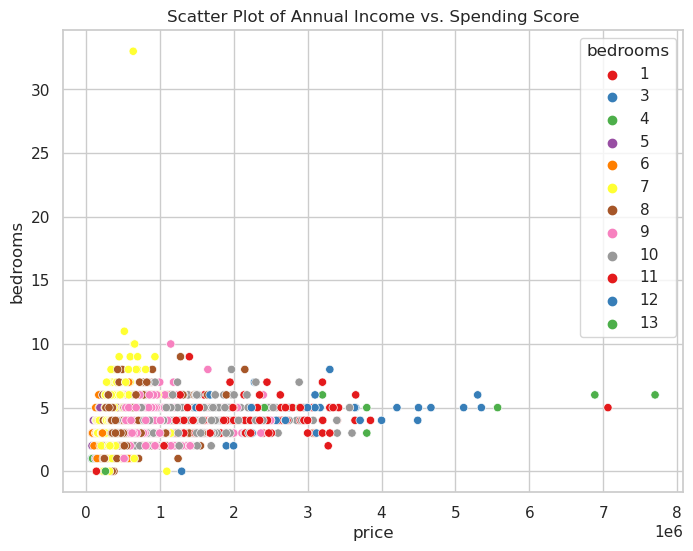

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Create a scatter plot with different colors for each gender
plt.figure(figsize=(8, 6))
sns.scatterplot(x="price", y='bedrooms', data=df, hue='grade', palette="Set1")

plt.title("Scatter Plot of Annual Income vs. Spending Score")
plt.xlabel("price")
plt.ylabel("bedrooms")
plt.legend(title="bedrooms")

plt.show()

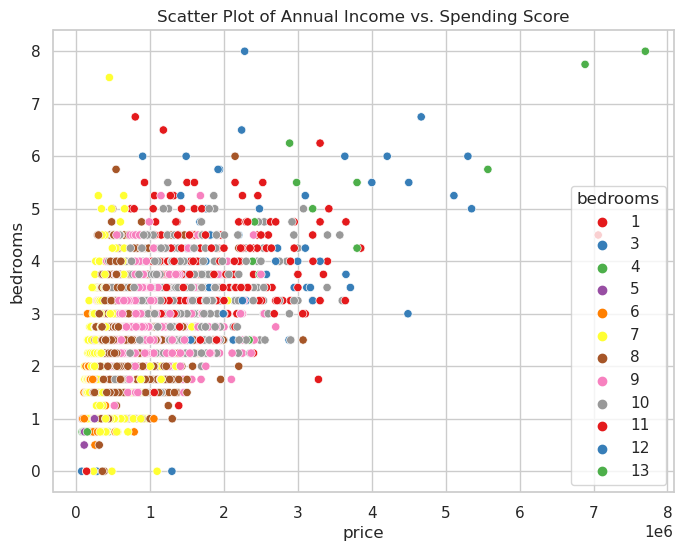

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Create a scatter plot with different colors for each gender
plt.figure(figsize=(8, 6))
sns.scatterplot(x="price", y='bathrooms', data=df, hue='grade', palette="Set1")

plt.title("Scatter Plot of Annual Income vs. Spending Score")
plt.xlabel("price")
plt.ylabel("bedrooms")
plt.legend(title="bedrooms")

plt.show()

In [78]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
standard_price_dependent_data=sc.fit_transform(price_dependent_df)


In [79]:
standard_price_dependent_data = pd.DataFrame(standard_price_dependent_data, columns=price_dependent_df.columns)

In [80]:
standard_price_dependent_data

,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,-0.398737,-1.447464,-0.979835,-0.305759,-0.558836,-0.734708,-0.658681,-0.352572,-0.943355
1,-0.398737,0.175607,0.533634,-0.305759,-0.558836,0.460841,0.245141,1.161568,-0.432686
2,-1.473959,-1.447464,-1.426254,-0.305759,-1.409587,-1.229834,-0.658681,1.283537,1.070140
3,0.676485,1.149449,-0.130550,-0.305759,-0.558836,-0.891699,1.397515,-0.283288,-0.914174
4,-0.398737,-0.149007,-0.435422,-0.305759,0.291916,-0.130895,-0.658681,0.409550,-0.272190
...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.598746,-0.305759,0.291916,-0.312039,-0.658681,1.004958,-0.666135
21609,0.676485,0.500221,0.250539,-0.305759,0.291916,0.629908,-0.658681,-0.356180,-0.228419
21610,-1.473959,-1.772078,-1.154047,-0.305759,-0.558836,-0.927928,-0.658681,0.247888,-1.410253
21611,-0.398737,0.500221,-0.522528,-0.305759,0.291916,-0.227505,-0.658681,-0.184414,-0.841221


In [85]:
# Create a list of regression models to consider
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X=price_dependent_df
y=df['price']
regression_models = [
    ('Linear Regression', LinearRegression(), {}),
    ('Random Forest Regressor', RandomForestRegressor(), {'n_estimators': [10, 50, 100]}),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(), {'n_estimators': [50, 100, 200]}),
    ('Support Vector Regressor', SVR(), {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']})
]
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model, param_grid in regression_models:
    # Create GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Retrieve best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    print(f"Best Parameters for {name}:", best_params)
    
    # Evaluate the model (e.g., on test data)
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for {name}:", mse)
    print("\n")

Best Parameters for Linear Regression: {}
Mean Squared Error for Linear Regression: 54365506802.634605


Best Parameters for Random Forest Regressor: {'n_estimators': 100}
Mean Squared Error for Random Forest Regressor: 36622500077.423805


Best Parameters for Gradient Boosting Regressor: {'n_estimators': 200}
Mean Squared Error for Gradient Boosting Regressor: 38308117679.772285


Best Parameters for Support Vector Regressor: {'C': 10.0, 'kernel': 'linear'}
Mean Squared Error for Support Vector Regressor: 76605918503.02464




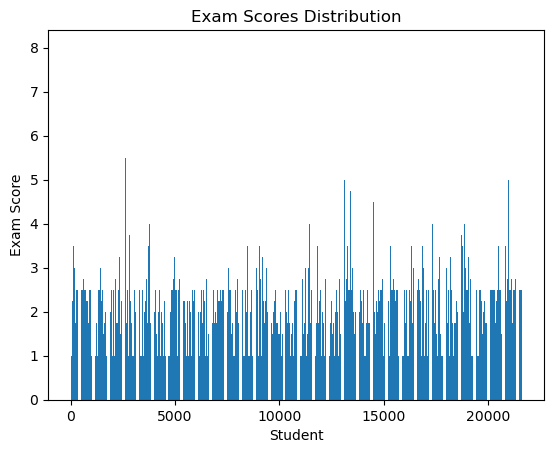

In [50]:
# check for ouliers in each graphs

import matplotlib.pyplot as plt

# Create a list of exam scores
scores = price_dependent_df['bathrooms']

# Create a bar chart of the scores
plt.bar(range(len(scores)), scores)
plt.xlabel('Student')
plt.ylabel('Exam Score')
plt.title('Exam Scores Distribution')
plt.show()